In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as sc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import keras

In [2]:
df = pd.read_csv('flukaRunsTyped.csv')

In [3]:
trainRatio = 0.8
# x is the tracklength in each bin
# y is the log of the energy
xfull = df.to_numpy()[:,:500]
yfull = np.log(df.to_numpy()[:,500])
particle_labels = df.to_numpy()[:,501:507]
xtrain, xtest, ytrain, ytest  = train_test_split(
    xfull, yfull, train_size=trainRatio, 
    stratify=particle_labels, shuffle=True, random_state=3)
ltottrain = np.sum(xtrain,axis=1)
ltottest = np.sum(xtrain,axis=1)

In [10]:
def logspl(logE,a,b):
    return a * np.exp(logE)**b
def funcspl(ltot,a,b):
    return (np.log(ltot) - np.log(a))/ b

In [11]:
popt, pcov = sc.optimize.curve_fit(funcspl,ltottrain,ytrain,p0=[4,1])
ytrainhat = funcspl(ltottrain,*popt)
popt

/var/folders/jj/vqtfjgcn3wz_ckd79n6lm42h0000gn/T/ipykernel_45384/588673893.py:4: RuntimeWarning: invalid value encountered in log
  return (np.log(ltot) - np.log(a))/ b


array([3.28085619e-05, 1.03593794e+00])

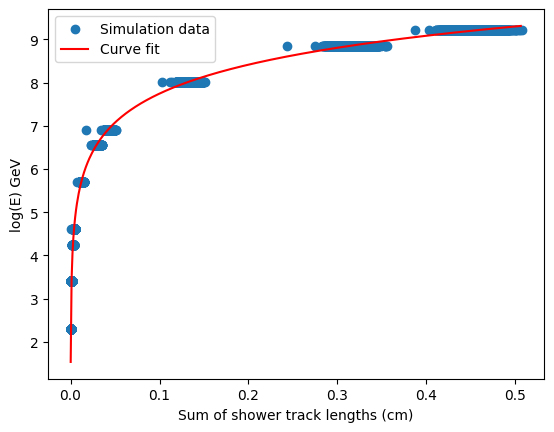

In [13]:
plt.scatter(ltottrain,ytrain,label='Simulation data')
xvals = np.arange(min(ltottrain),max(ltottrain),0.001)
plt.plot(xvals,funcspl(xvals,*popt),'r',label='Curve fit')
plt.xlabel('Sum of shower track lengths (cm)')
plt.ylabel('log(E) GeV')
plt.legend()
plt.show()

In [14]:
np.mean((ytrain - ytrainhat)**2)

0.007299796803286723

In [78]:
ltot = np.zeros(df.shape[0])
data = df.to_numpy()
for i in range(500):
    ltot += data[:,i]
df.insert(df.shape[1],'ltot',ltot)

In [134]:
popt, pcov = sc.optimize.curve_fit(spl,df.energy,df.ltot,p0=[350,1])

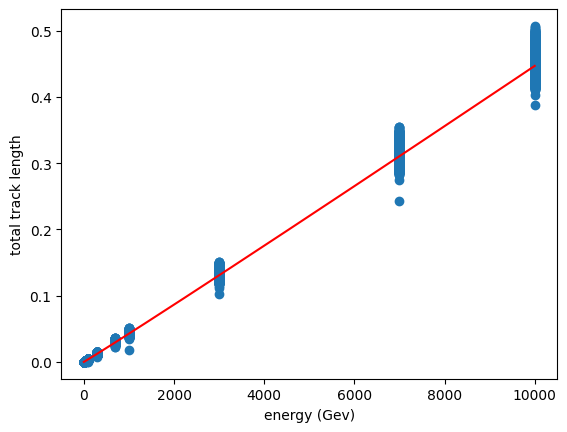

In [143]:
plt.scatter(df.energy,df.ltot)
xval = np.arange(0,10000)
plt.plot(xval,spl(xval,*popt),'r')
plt.xlabel('energy (Gev)')
plt.ylabel('total track length')
plt.show()

In [136]:
#fit with single power law from energy totals to find the params
#then we build energy predictor by inverting with params
#then we build a neural net that takes the params directly 

In [137]:
def spl(E,a,b):
    return a * (E**b)

In [138]:
def splinv(l,a,b):
    return (l/a)**(1/b)

In [139]:
np.sum((np.log(df.energy) - np.log(splinv(df.ltot,popt[0],popt[1])))**2)/df.shape[0]

0.009235807379861953

In [140]:
(np.log(df.energy) - np.log(splinv(df.ltot,popt[0],popt[1])))**2

0        0.002366
1        0.025038
2        0.016209
3        0.011587
4        0.007059
           ...   
59995    0.000029
59996    0.000403
59997    0.000631
59998    0.000222
59999    0.000833
Length: 60000, dtype: float64

In [141]:
df.energy

0           10.0
1           10.0
2           10.0
3           10.0
4           10.0
          ...   
59995    10000.0
59996    10000.0
59997    10000.0
59998    10000.0
59999    10000.0
Name: energy, Length: 60000, dtype: float64

In [142]:
splinv(df.ltot,popt[0],popt[1])

0            9.525214
1           11.714409
2            8.804560
3            8.979497
4            9.194160
             ...     
59995     9946.263570
59996    10202.864069
59997     9751.942563
59998     9852.051460
59999     9715.430081
Name: ltot, Length: 60000, dtype: float64

In [171]:
def logspl(logE,loga,b):
    return loga + b*logE

In [172]:
logl = np.log(df.ltot)
logE = np.log(df.energy)

In [173]:
poptl, pcovl = sc.optimize.curve_fit(logspl,logE,logl,p0=[-4,29])
poptl

array([-10.31664017,   1.03451711])

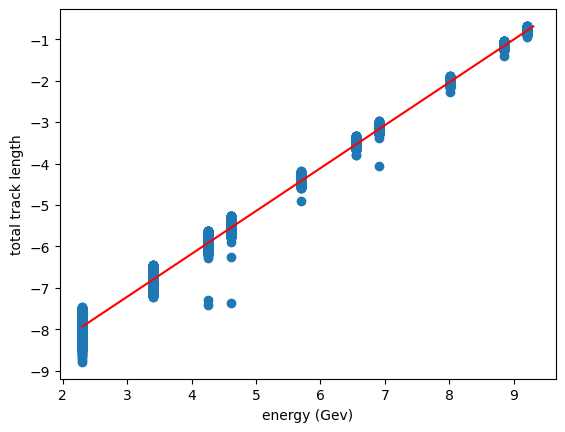

In [174]:

plt.scatter(logE,logl)
xval = np.arange(np.log(10),np.log(10000) + 1)
plt.plot(xval,logspl(xval,*poptl),'r')
plt.xlabel('energy (Gev)')
plt.ylabel('total track length')
plt.show()

In [179]:
loga = poptl[0]
b = poptl[1]
logEpred = (logl - loga)/b

In [1]:
np.mean((logEpred - logE)**2)

NameError: name 'np' is not defined